# Earthquake Clustering

## Data Prep

In [1]:
import pandas as pd

df = pd.read_csv("data/earthquake_data_20251005_231758.csv")

df.head()

,datetime,latitude,longitude,depth,magnitude,location
0,2025-10-05 22:59:00,9.41,126.33,17,1.8,021 km N 44Â° E of Cortes (Surigao Del Sur)
1,2025-10-05 22:57:00,11.15,123.93,8,2.0,012 km N 27Â° W of City Of Bogo (Cebu)
2,2025-10-05 22:55:00,7.52,126.87,25,2.4,034 km S 80Â° E of Baganga (Davao Oriental)
3,2025-10-05 22:36:00,9.27,126.55,10,3.9,039 km S 89Â° E of Cortes (Surigao Del Sur)
4,2025-10-05 22:28:00,11.16,123.95,5,2.4,012 km N 15Â° W of City Of Bogo (Cebu)


In [2]:
data = df[["latitude", "longitude", "depth", "magnitude"]]

Matplotlib is building the font cache; this may take a moment.


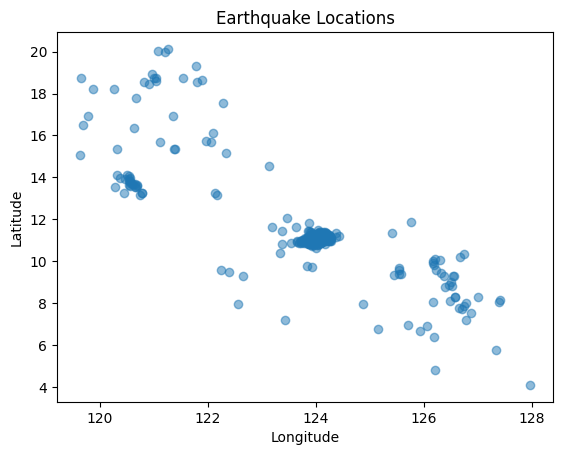

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df["longitude"], df["latitude"], alpha=0.5)
plt.title("Earthquake Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

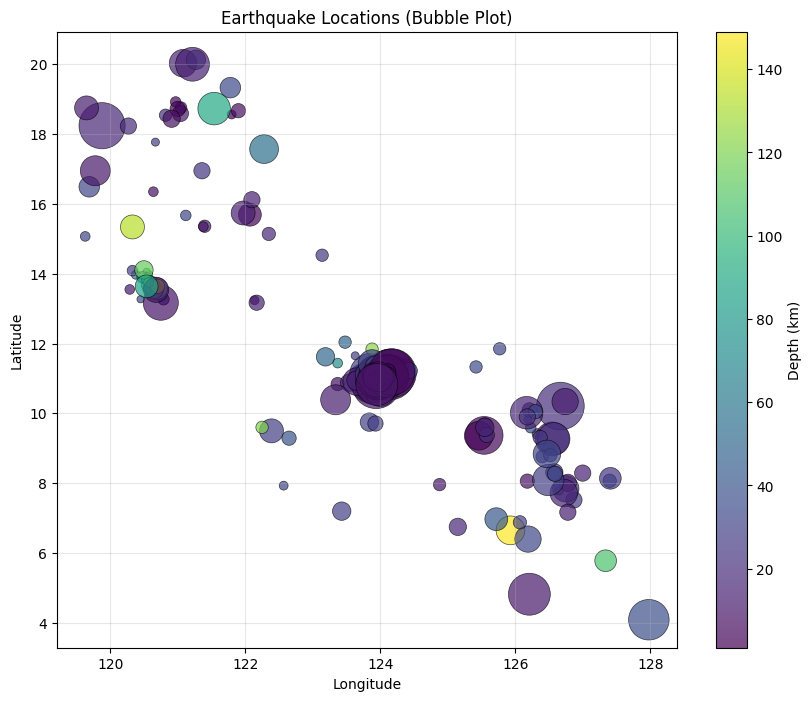

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 8))

# Bubble plot
plt.scatter(
    df["longitude"],
    df["latitude"],
    s=df["magnitude"]**3 * 10,  # Bubble size (scaled by magnitude³ for visibility)
    c=df["depth"],              # Color by depth
    cmap="viridis",             # Colormap (you can use 'plasma', 'coolwarm', etc.)
    alpha=0.7,
    edgecolors="k",
    linewidths=0.5
)

plt.colorbar(label="Depth (km)")
plt.title("Earthquake Locations (Bubble Plot)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.grid(alpha=0.3)
plt.show()


## DBSCAN Clustering

In [6]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Normalize to handle different numeric scales
scaled = StandardScaler().fit_transform(data)

# DBSCAN parameters:
# eps controls distance sensitivity — start with 0.5 and tune
# min_samples controls minimum points to form a cluster
db = DBSCAN(eps=0.5, min_samples=5).fit(scaled)

df["cluster"] = db.labels_


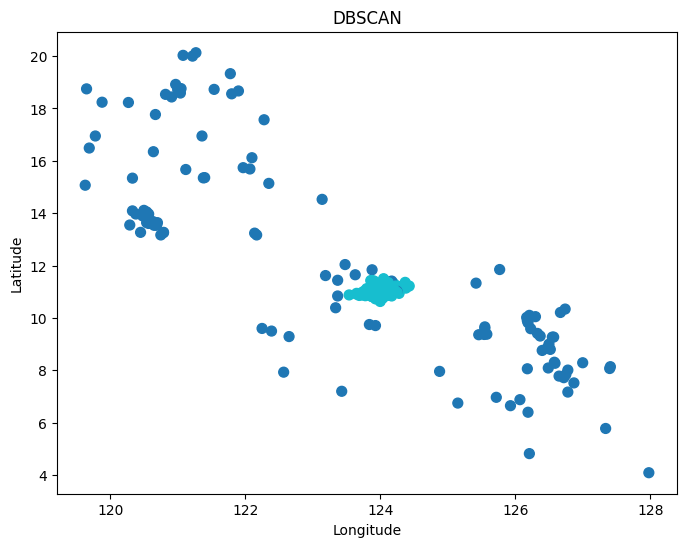

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(df["longitude"], df["latitude"], c=df["cluster"], cmap="tab10", s=50)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("DBSCAN")
plt.show()

In [23]:
cluster_summary = df.groupby("cluster")["magnitude"].agg(["count", "mean", "max"])
print(cluster_summary)

         count      mean  max
cluster                      
-1         130  2.578462  5.1
 0        1319  2.227369  4.8


## K-Means Clustering

In [20]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

X = df[["latitude", "longitude", "depth", "magnitude"]]

# Choose number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster_kmeans"] = kmeans.fit_predict(X)

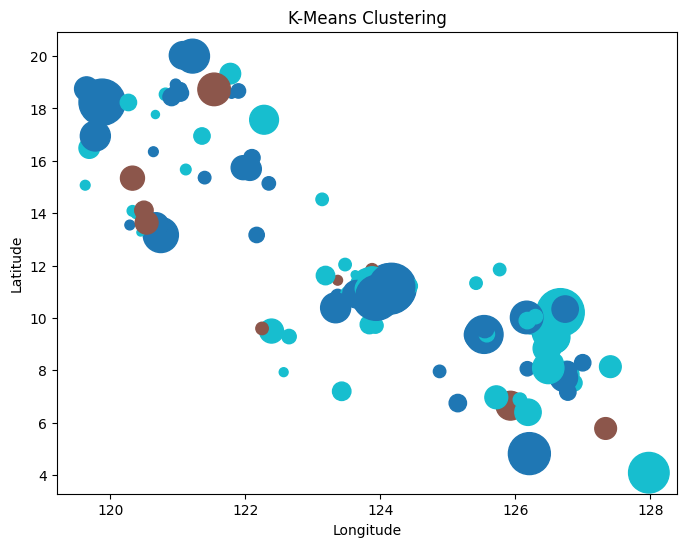

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(df["longitude"], df["latitude"], c=df["cluster_kmeans"], cmap="tab10", s=df["magnitude"]**3 * 10)
plt.title("K-Means Clustering")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Agglomerative Clustering

In [9]:
from sklearn.cluster import AgglomerativeClustering

X = df[["latitude", "longitude", "depth", "magnitude"]]
model = AgglomerativeClustering(n_clusters=6, linkage='ward')
df["cluster_hier"] = model.fit_predict(X)

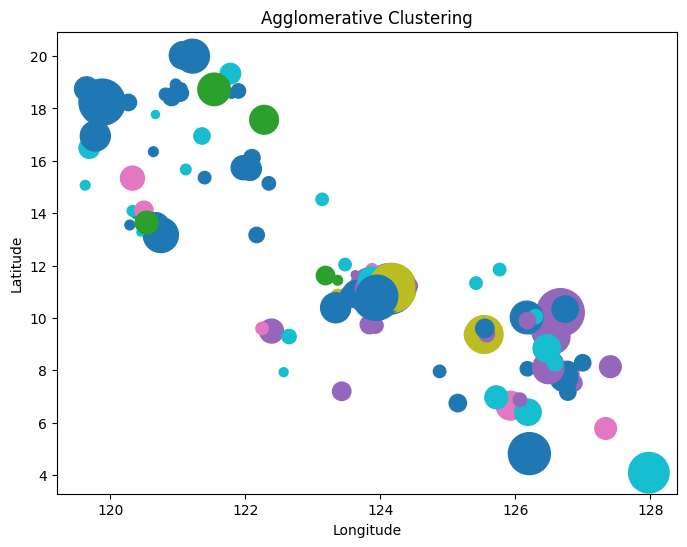

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(df["longitude"], df["latitude"], c=df["cluster_hier"], cmap="tab10", s=df["magnitude"]**3 * 10)
plt.title("Agglomerative Clustering")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Mean Shift Clustering

In [11]:
from sklearn.cluster import MeanShift

X = df[["latitude", "longitude", "depth", "magnitude"]]
ms = MeanShift()
df["cluster_meanshift"] = ms.fit_predict(X)

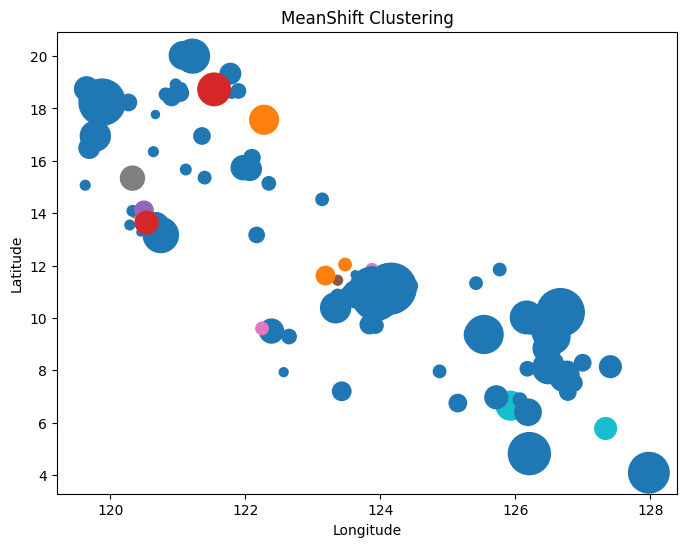

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(df["longitude"], df["latitude"], c=df["cluster_meanshift"], cmap="tab10", s=df["magnitude"]**3 * 10)
plt.title("MeanShift Clustering")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## OPTICS Clustering

In [13]:
from sklearn.cluster import OPTICS

X = df[["latitude", "longitude", "depth", "magnitude"]]
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
df["cluster_optics"] = optics.fit_predict(X)

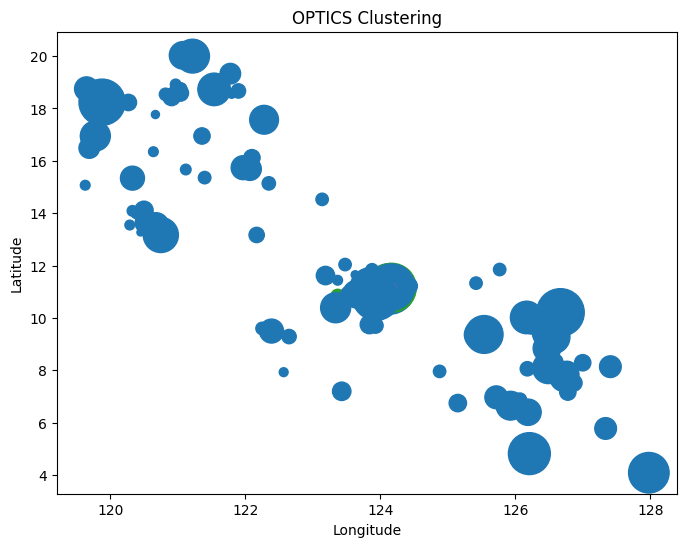

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(df["longitude"], df["latitude"], c=df["cluster_optics"], cmap="tab10", s=df["magnitude"]**3 * 10)
plt.title("OPTICS Clustering")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## HDBSCAN Clustering

In [15]:
import hdbscan

X = df[["latitude", "longitude", "depth", "magnitude"]]
clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
df["cluster_hdbscan"] = clusterer.fit_predict(X)

/Users/maxellmilay/.pyenv/versions/3.12.0/envs/earthquake-prediction/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/maxellmilay/.pyenv/versions/3.12.0/envs/earthquake-prediction/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


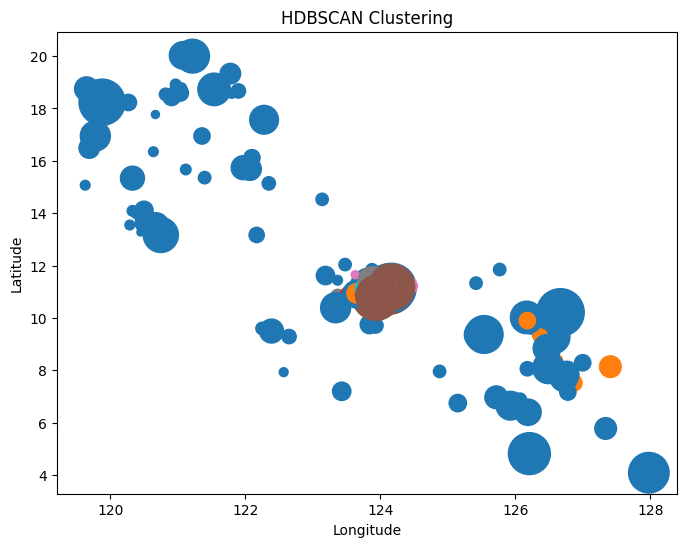

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(df["longitude"], df["latitude"], c=df["cluster_hdbscan"], cmap="tab10", s=df["magnitude"]**3 * 10)
plt.title("HDBSCAN Clustering")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()